In [26]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
import tensorflow as tf

import os
import pickle
from model_vrnn import VRNN
import numpy as np

from train_vrnn import next_batch

with open(os.path.join('save-vrnn', 'config.pkl'),'rb') as f:
    saved_args = pickle.load(f)

model = VRNN(saved_args, True)
sess = tf.InteractiveSession()
saver = tf.train.Saver(tf.all_variables())

ckpt = tf.train.get_checkpoint_state('save-vrnn')
print("loading model: ",ckpt.model_checkpoint_path)

saver.restore(sess,ckpt.model_checkpoint_path)
sample_data,mus,sigmas = model.sample(sess,saved_args,num=70000)
#print(sigmas.shape)
#print(len(sigmas))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


rnn/VartiationalRNNCell/Prior/hidden/Linear/Matrix:0
rnn/VartiationalRNNCell/Prior/hidden/Linear/bias:0
rnn/VartiationalRNNCell/Prior/mu/Linear/Matrix:0
rnn/VartiationalRNNCell/Prior/mu/Linear/bias:0
rnn/VartiationalRNNCell/Prior/sigma/Linear/Matrix:0
rnn/VartiationalRNNCell/Prior/sigma/Linear/bias:0
rnn/VartiationalRNNCell/phi_x/Linear/Matrix:0
rnn/VartiationalRNNCell/phi_x/Linear/bias:0
rnn/VartiationalRNNCell/Encoder/hidden/Linear/Matrix:0
rnn/VartiationalRNNCell/Encoder/hidden/Linear/bias:0
rnn/VartiationalRNNCell/Encoder/mu/Linear/Matrix:0
rnn/VartiationalRNNCell/Encoder/mu/Linear/bias:0
rnn/VartiationalRNNCell/Encoder/sigma/Linear/Matrix:0
rnn/VartiationalRNNCell/Encoder/sigma/Linear/bias:0
rnn/VartiationalRNNCell/phi_z/Linear/Matrix:0
rnn/VartiationalRNNCell/phi_z/Linear/bias:0
rnn/VartiationalRNNCell/Decoder/hidden/Linear/Matrix:0
rnn/VartiationalRNNCell/Decoder/hidden/Linear/bias:0
rnn/VartiationalRNNCell/Decoder/mu/Linear/Matrix:0
rnn/VartiationalRNNCell/Decoder/mu/Linear/bia

In [3]:
np.save('gen-not-gauss.npy',sample_data)

In [2]:
sample_data = np.load('gen-not-gauss.npy')

In [4]:
def denormalize(normArray):
    def denormalize_one_dim(data,maxV=1, minV=0, high=1, low=-1):
        return ((((data - high) * (maxV - minV))/(high - low)) + maxV)

    Array = normArray.copy()

    # MinMax Values for different dataset
    # GooG
    maxV =  [23,16500,1,1,942,150,942,942,3000,3000]
    minV = [0,0,0,0,916,0,916,916,1,1]

    for i in range(Array.shape[2]):
        Array[:,:,i] = denormalize_one_dim(normArray[:,:,i],maxV=maxV[i],minV=minV[i])

    return Array

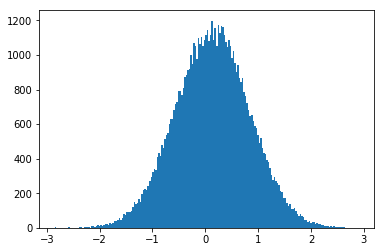

In [5]:
im = plt.hist(sample_data[:,5],bins=200)

In [6]:
new_data = denormalize(np.expand_dims(sample_data[:,:10],0))

In [140]:
d_inte = [d[1] for d in new_data[0,:,:]]# if d[2] < 0.5 and d[3] < 0.5]

In [141]:
for i in range(1,len(d_inte)):
    d_inte[i] += d_inte[i-1]

In [142]:
len(d_inte)

70000

Text(0.5,0,'Best-ask')

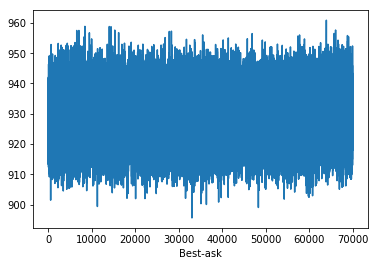

In [81]:
im = plt.plot(new_data[0,:,7])
plt.xlabel('Best-ask')

Text(0.5,0,'Intensity')

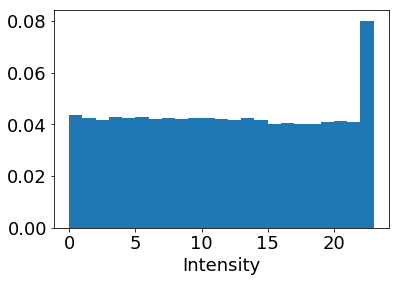

In [169]:
im = plt.hist([int(d/1000000) % 24 for d in d_inte],bins=23,density=True)
plt.xlabel('Intensity')

In [144]:
y =[]
for yy in im[0]:
    if yy > 0:
        y.append(yy/70000)

Text(0.5,0,'Intensity')

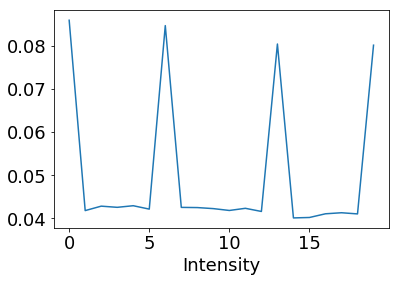

In [145]:
plt.plot(y)
plt.xlabel('Intensity')

Text(0.5,0,'Inter-Arrival-Buy')

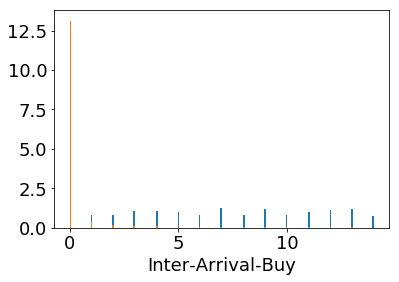

In [103]:
im = plt.hist([int(d[1]/100) for d in new_data[0,:,:] if d[2] < 0.5 and d[3] < 0.5 and d[1] > 0 and d[1] < 1500],bins=200,density=True)
im2 = plt.hist([int(d/100) for d in data[:,:,:,1,0].reshape(-1) if d < 1500],bins=200,density=True)
plt.xlabel('Inter-Arrival-Buy')

In [201]:
data_buy = data[:,:,:,5,0].reshape(-1)
data_type1 = data[:,:,:,2,0].reshape(-1)
data_type2 = data[:,:,:,3,0].reshape(-1)

Text(0.5,0,'Inter-Arrival-Buy')

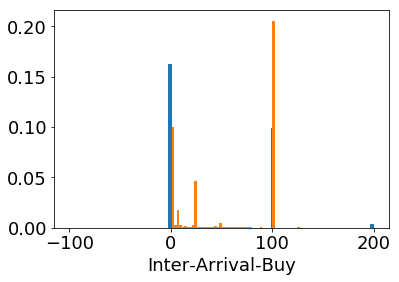

In [211]:
im = plt.hist([int(d[5]/100)*100 for d in new_data[0,:,:] if d[2] < 0.5 and d[3] < 0.5],bins=80,density=True)
im2 = plt.hist([d for d,dt1,dt2 in zip(data_buy,data_type1,data_type2) if dt1==0 and dt2==0 and d < 200],bins=80,density=True)
plt.xlabel('Inter-Arrival-Buy')

In [44]:
new_data.shape

(1, 70000, 10)

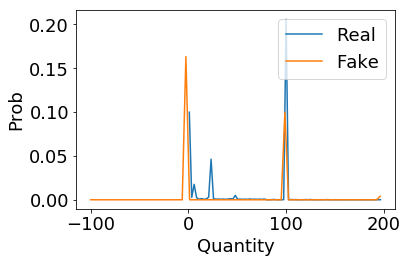

In [212]:
plt.plot(im2[1][:-1],im2[0])
plt.plot(im[1][:-1],im[0])
plt.legend(['Real','Fake'])
plt.xlabel('Quantity')
plt.ylabel('Prob')
plt.tight_layout()

In [19]:
np.sum(new_data[0,:,2] < 0.5)/70000

0.3549857142857143

In [182]:
data = np.load('data_1.npy')

In [183]:
data.shape

(5291, 64, 21, 10, 1)

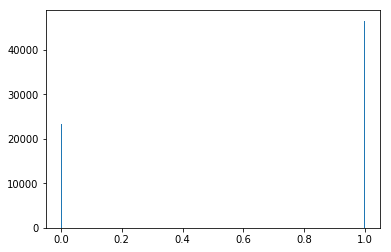

In [16]:
ty = [1 if t > 0.484 else 0 for t in new_data[0,:,2]]
im = plt.hist(ty,bins=200)

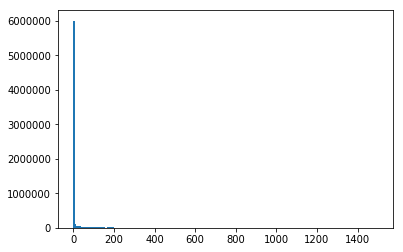

In [52]:
#im = plt.hist(new_data[0,:,4].astype(int),bins=200,)
im2 = plt.hist([d for d in data[:,:,:,1,0].reshape(-1) if d < 1500],bins=200)

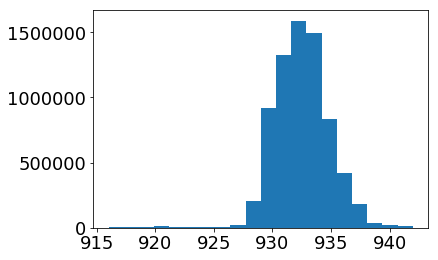

In [185]:
im2 = plt.hist([d for d in data[:,:,:,4,0].reshape(-1)],bins=20)

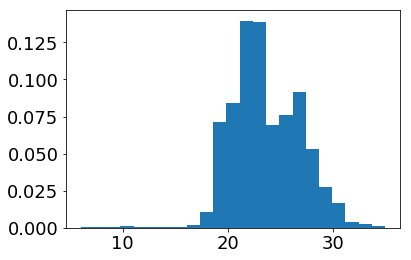

In [181]:
im2 = plt.hist(data[:,4,0],bins=23,density=True)

In [21]:
len(data[:,:,:,0,0].reshape(-1))

7111104

In [160]:
y_true =[]
for yy in im2[0]:
    if yy > 0:
        y_true.append(yy/338692)

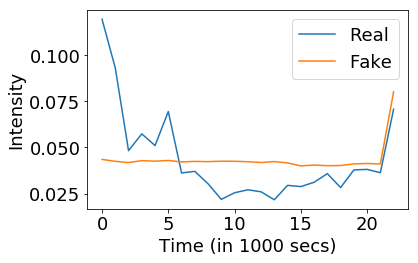

In [170]:
plt.plot(im2[0])
plt.plot(im[0])
plt.legend(['Real','Fake'])
plt.xlabel('Time (in 1000 secs)')
plt.ylabel('Intensity')
plt.tight_layout()